build a text classification model to classify news article into different categories

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer#TEST PROCESSING
import missingno as mns# CHECKING FOR MISSING TEXTS
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [62]:
df = pd.read_csv('ecommerceDataset.csv', header=None)
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [63]:
df.columns = ['category', 'text']

In [64]:
df.head()

,category,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [65]:
df['category'].value_counts()

category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

<Axes: >

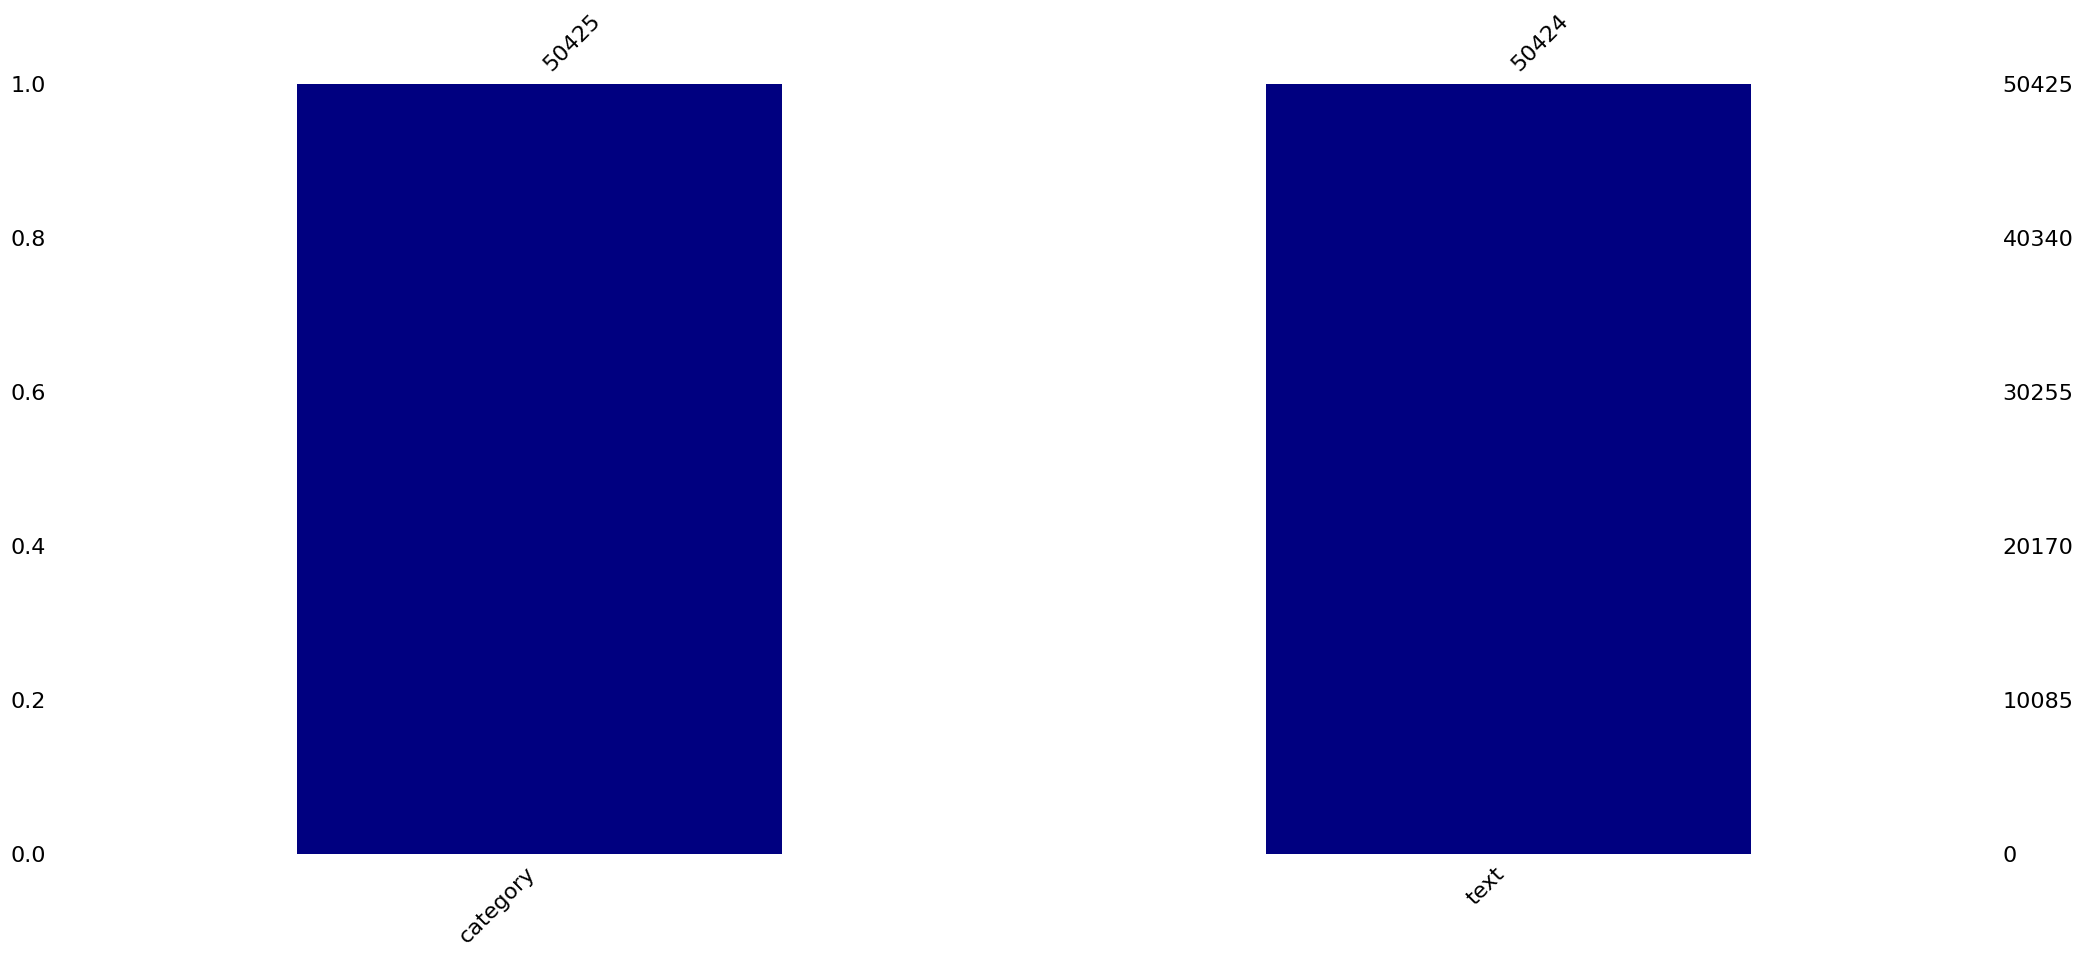

In [66]:
mns.bar(df, color = 'navy', sort = 'descending')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  50425 non-null  object
 1   text      50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [68]:
df.shape

(50425, 2)

In [69]:
df.isnull().sum()

category    0
text        1
dtype: int64

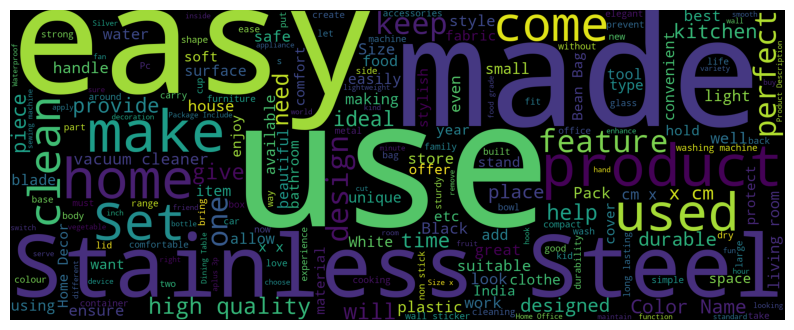

In [70]:
newdata = df[df['category'] == 'Household']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS, background_color = 'black', width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

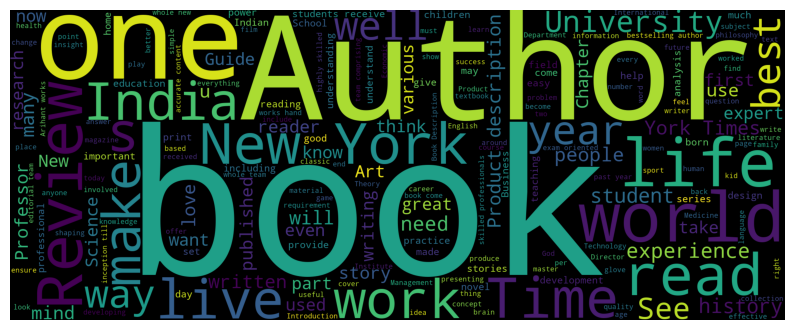

In [71]:
newdata = df[df['category'] == 'Books']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS, background_color = 'black', width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

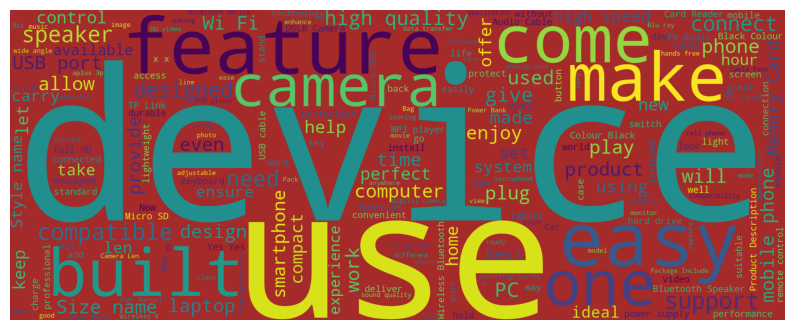

In [72]:
newdata = df[df['category'] == 'Electronics']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS, background_color = 'brown', width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [73]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

newdata = df[df['category'] == 'Clothing $ Accessories']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
print("Cleaned words:")
print(cleanword)

if len(cleanword) > 0:
    WC=WordCloud(stopwords=stopwords.words('english'), background_color = 'black', width=2000, height=800).generate(cleanword)
    plt.figure(1, figsize=(10,10))
    plt.imshow(WC)
else:
    print("Error: No words to plot in the word cloud.")

Cleaned words:

Error: No words to plot in the word cloud.


In [74]:
text_cleaning_re = "@\S+|https?:\S+|https?:\S|[^A-Za-z0-9]+"
def preprocessing(x, stem = False):
    x =  re.sub(text_cleaning_re, ' ', str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(tokens)
df.text = df.text.apply(lambda x: preprocessing(x))

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\USER\AppData\Local\Temp\ipykernel_2768\4152659821.py:1: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|https?:\S|[^A-Za-z0-9]+"


In [75]:
df['text'].head()

0    paper plane design framed wall hanging motivat...
1    saf floral framed painting wood 30 inch x 10 i...
2    saf uv textured modern art print framed painti...
3    saf flower print framed painting synthetic 13 ...
4    incredible gifts india wooden happy birthday u...
Name: text, dtype: object

In [76]:
from sklearn.utils import resample
df_negative = df[df['category']=='Housing']
df_neutral = df[df['category']=='Books']
df_positive = df[df['category']=='Electronics']
df_positive = df[df['category']=='Clothing & Accessories']


dfsam1 = resample(df_positive,n_samples=9178)
dfsam2 = resample(df_neutral,n_samples=9178)
df = pd.concat([df_negative, dfsam1, dfsam2])
df = df.sample(frac=1)

In [77]:
x = df.text
y = df['category']

In [78]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.2, random_state=400)


In [79]:
naivebayes = Pipeline([('vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])
mlp = Pipeline([('vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model', MLPClassifier(hidden_layer_sizes=(10,10)))])

In [80]:
xtrain = xtrain.fillna('')
ytrain = ytrain.fillna('')

# Fit the model
naivebayes.fit(xtrain, ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])

In [81]:
pred1 = naivebayes.predict(xtest)
pred1

array(['Clothing & Accessories', 'Clothing & Accessories',
       'Clothing & Accessories', ..., 'Clothing & Accessories',
       'Clothing & Accessories', 'Books'], dtype='<U22')

In [82]:
print(classification_report(ytest, pred1))

                        precision    recall  f1-score   support

                 Books       1.00      0.67      0.80      1835
Clothing & Accessories       0.75      1.00      0.86      1837

              accuracy                           0.83      3672
             macro avg       0.87      0.83      0.83      3672
          weighted avg       0.87      0.83      0.83      3672



<Axes: >

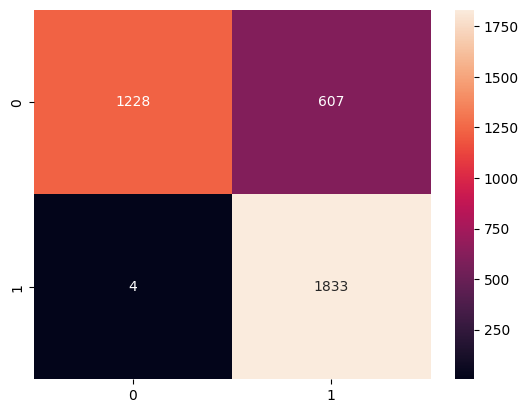

In [83]:
cm = confusion_matrix(ytest, pred1)
sns.heatmap(cm, annot=True, fmt = '0.5g')

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'Transformer__use_idf':[True,False],
    'Model__alpha':[0.1,0.5,1.0]
}
naivebayes_tuning = Pipeline([('vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])
grid_search = GridSearchCV(naivebayes_tuning, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('Transformer', TfidfTransformer()),
                                       ('Model', BernoulliNB())]),
             param_grid={'Model__alpha': [0.1, 0.5, 1.0],
                         'Transformer__use_idf': [True, False],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [85]:
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation accuracy: {:.2f}'. format(grid_search.best_score_))

Best parameters: {'Model__alpha': 0.1, 'Transformer__use_idf': True, 'vectorizer__ngram_range': (1, 1)}
Best cross-validation accuracy: 0.87


In [86]:
best_naivebayes_model = grid_search.best_estimator_
best_naivebayes_model.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', BernoulliNB(alpha=0.1))])

In [87]:
pred2 = best_naivebayes_model.predict(xtest)
pred2

array(['Clothing & Accessories', 'Clothing & Accessories',
       'Clothing & Accessories', ..., 'Clothing & Accessories',
       'Clothing & Accessories', 'Books'], dtype='<U22')

In [88]:
print(classification_report(ytest,pred2))

                        precision    recall  f1-score   support

                 Books       1.00      0.73      0.84      1835
Clothing & Accessories       0.79      1.00      0.88      1837

              accuracy                           0.86      3672
             macro avg       0.89      0.86      0.86      3672
          weighted avg       0.89      0.86      0.86      3672



<Axes: >

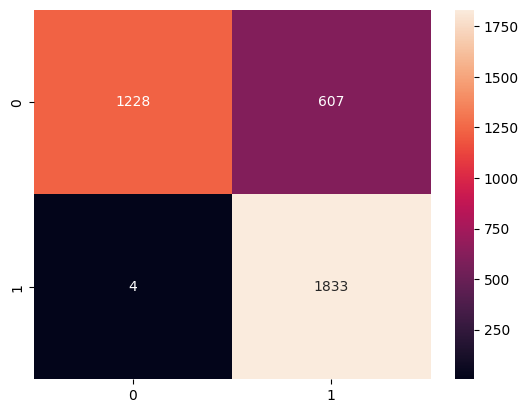

In [89]:
sm2 = confusion_matrix(ytest,pred2)
sns.heatmap(cm,annot=True,fmt='0.5g')

In [90]:
mlp.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

In [91]:
pred3 = mlp.predict(xtest)
pred3

array(['Books', 'Clothing & Accessories', 'Books', ..., 'Books',
       'Clothing & Accessories', 'Books'], dtype='<U22')

In [92]:
print(classification_report(ytest, pred3))

                        precision    recall  f1-score   support

                 Books       1.00      1.00      1.00      1835
Clothing & Accessories       1.00      1.00      1.00      1837

              accuracy                           1.00      3672
             macro avg       1.00      1.00      1.00      3672
          weighted avg       1.00      1.00      1.00      3672



<Axes: >

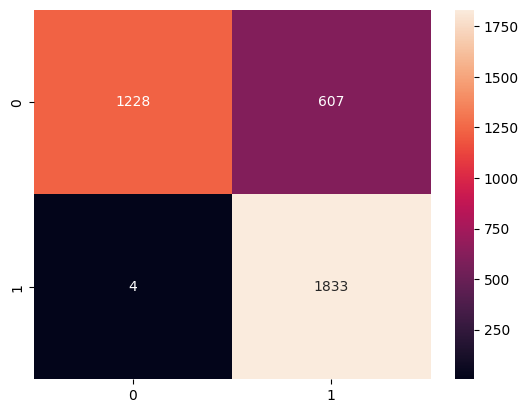

In [93]:
sm2 = confusion_matrix(ytest,pred3)
sns.heatmap(cm,annot=True,fmt='0.5g')